# Enunciado:

El conjunto de datos adjunto contiene información sobre los clientes de un centro comercial. Cada fila representa a un cliente y las columnas contienen diferentes características o atributos sobre ellos:, como edad, ingreso anual, puntaje de gasto (una medida de cuánto gastan en el centro comercial), etc.

    - Edad: Edad del cliente.
    - Ingreso anual: Ingreso anual del cliente en miles de dólares.
    - Puntaje de gasto: Puntaje asignado al cliente en función de su historial de gastos en el centro comercial (en una escala del 1 al 100).
Con este conjunto de datos emplea clustering jerárquico con el objetivo de segmentar a los clientes en diferentes grupos basados en sus características, lo que puede ayudar al centro comercial a comprender mejor a su base de clientes y personalizar sus estrategias de marketing y ventas.

Además, visualiza los resultados utilizando un dendrograma y establece un punto de corte óptimo.

P.D.- Seleccionar el número óptimo de clusters observando el dendrograma es un proceso visual que implica identificar los cortes en el dendrograma donde la altura del corte muestra una separación clara entre los clusters. Estos cortes representan divisiones significativas en los clusters. Busca cortes que formen grupos coherentes de datos y evita cortes que dividan grupos grandes en clusters demasiado pequeños.

In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv('csv/customers.csv')
df.head()

,Edad,Ingreso_anual,Puntaje_gasto
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Edad           358 non-null    int64
 1   Ingreso_anual  358 non-null    int64
 2   Puntaje_gasto  358 non-null    int64
dtypes: int64(3)
memory usage: 8.5 KB


In [54]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(df)

In [55]:
X_scaled

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       ...,
       [0.32692308, 1.        , 0.79591837],
       [0.51923077, 1.        , 0.2755102 ],
       [0.26923077, 1.        , 0.74489796]])

In [56]:
# Representamos el dataset escalado, para ello reducimos la dimensionalidad a 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

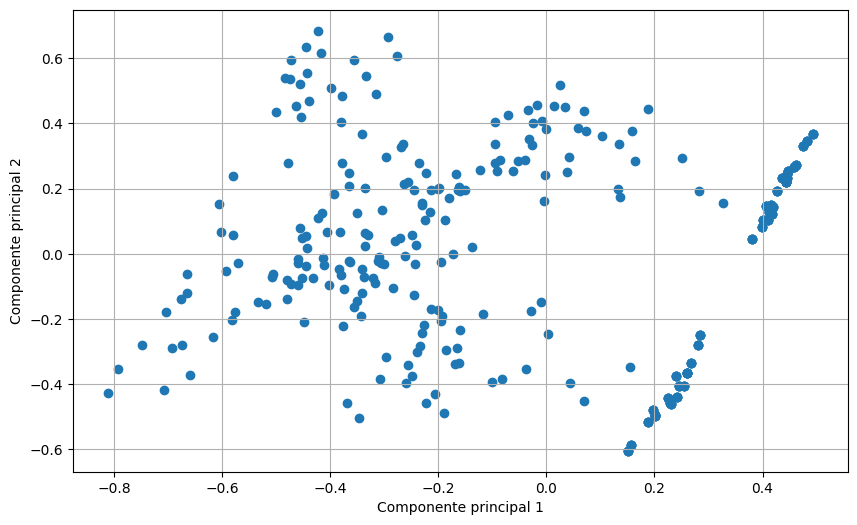

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

## Clustering jerárquico

In [58]:
from sklearn.metrics import pairwise_distances

matdist = pairwise_distances(X_scaled, metric='euclidean')
avDist = np.mean(matdist)
print("Distancia Media\t {:6.2f}".format(avDist))

Distancia Media	   0.66


C:\Users\sergi\AppData\Local\Temp\ipykernel_24116\692892784.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method='complete')


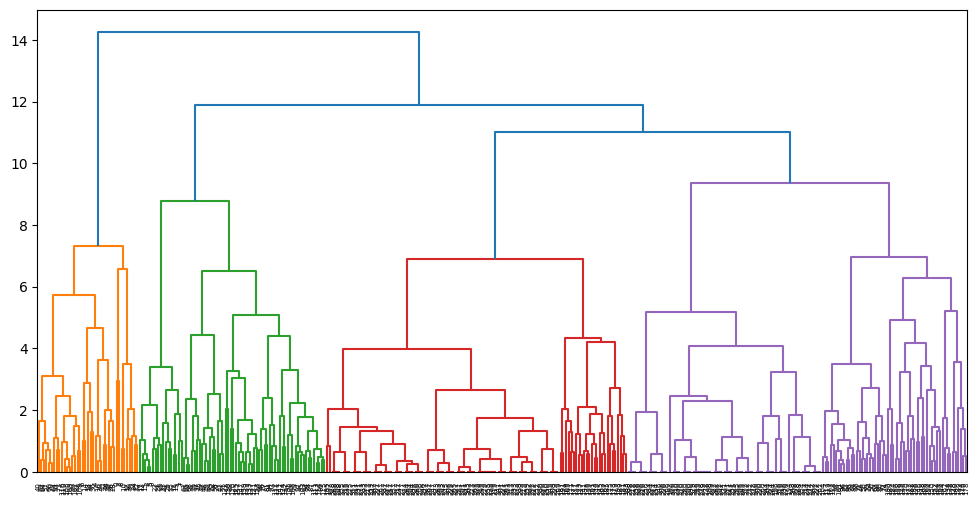

In [59]:
from scipy import cluster

plt.figure(figsize=(12, 6))
clusters = cluster.hierarchy.linkage(matdist, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=11)
plt.show()

In [61]:
# 3. Obtenemos el grupo al que pertenece cada observación
threshold = 11 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 4


array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 4, 2, 2, 2, 4, 2, 2, 1, 4, 4, 4, 1, 2, 4, 1, 2, 1, 4, 1, 2,
       2, 1, 2, 2, 1, 4, 4, 1, 4, 2, 2, 2, 2, 4, 4, 2, 1, 4, 2, 4, 4, 2,
       2, 4, 1, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 1, 2, 4, 2, 1, 4, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 4, 4, 4, 2, 2, 2, 3, 2, 2, 4, 3, 4, 4, 2, 2,
       2, 2, 4, 3, 4, 2, 4, 2, 4, 3, 2, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 2,
       4, 3, 4, 2, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4,
       3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4,

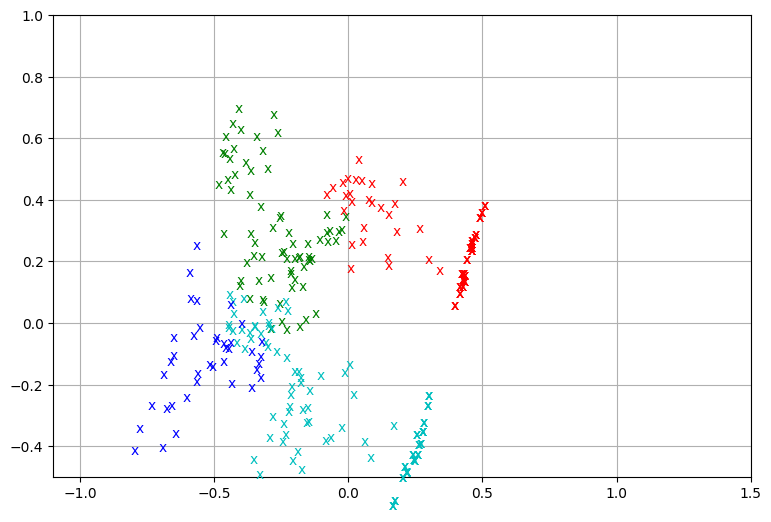

In [64]:
colores = 'bgrcmyk'
plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i] - 1])
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)
plt.grid()
plt.show()